# We will define the joint multinomial distribution of the Persistence entropies and Volume and Behaviour

In [1]:
import numpy
import pymc as pm
import arviz as az
import pandas as pd
import os 
import arviz as az
import graphviz as gr
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os
import numpy as np
import warnings
import statsmodels.api as sm
import seaborn as sns
import pytensor.tensor as pt

from scipy.stats import expon, multivariate_normal, norm

warnings.filterwarnings("ignore", module="scipy")

print(f"Running on PyMC v{pm.__version__}")

RANDOM_SEED = 8924

Running on PyMC v5.12.0


In [15]:
behav = pd.read_csv("dgrpool_kl_behaviour.tsv", sep='\t')
#brain = pd.read_csv("../../Results_Vol_Entropy/GWAS_Normalized_EntropyVol.tsv", sep='\t')
#brain = pd.read_csv("../Results_Vol_Entropy/GWAS_Normalized_EntropyVol.tsv", sep='\t')
brain = pd.read_csv("../GWAS_Normalized_EntropyVol.tsv", sep="\t")

In [21]:
merged_df = pd.merge(brain, behav, on=['DGRP', 'sex'])

In [23]:
col_to_analyse = ['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'KL_ls']


In [22]:
df = pd.read_csv("canonical_ecc_micromodel.csv")
col_to_keep = ["DGRP","sex","canonical_ecc"]
df = df[col_to_keep]
df

,DGRP,sex,canonical_ecc
0,DGRP_517,F,0.004152
1,DGRP_517,F,-0.003050
2,DGRP_517,F,0.003396
3,DGRP_517,F,0.002721
4,DGRP_517,F,0.002656
...,...,...,...
15765,DGRP_787,M,-0.006454
15766,DGRP_787,M,-0.005167
15767,DGRP_787,M,0.001560
15768,DGRP_787,M,0.002700


In [24]:
merged_df = pd.merge(merged_df, df, on=['DGRP', 'sex'])
merged_df

,DGRP,sex,Volume,Entropy0,Entropy1,Entropy2,mean_frac,mean_ls,mean_ns_frac,mean_ns_ls,...,LSM_frac_se,LSM_ls,LSM_ls_se,KL_frac,KL_ls,en_s_frac,en_ns_frac,en_s_ls,en_ns_ls,canonical_ecc
0,DGRP_228,M,0.010962,1.789805,1.835055,2.143064,0.252438,0.402100,0.260839,-0.138653,...,0.029125,0.427552,0.541586,1.185655,2.401693,1.157373,0.777462,1.543789,1.251156,0.004244
1,DGRP_228,M,0.010962,1.789805,1.835055,2.143064,0.252438,0.402100,0.260839,-0.138653,...,0.029125,0.427552,0.541586,1.185655,2.401693,1.157373,0.777462,1.543789,1.251156,0.003599
2,DGRP_228,M,0.010962,1.789805,1.835055,2.143064,0.252438,0.402100,0.260839,-0.138653,...,0.029125,0.427552,0.541586,1.185655,2.401693,1.157373,0.777462,1.543789,1.251156,-0.847201
3,DGRP_228,M,0.010962,1.789805,1.835055,2.143064,0.252438,0.402100,0.260839,-0.138653,...,0.029125,0.427552,0.541586,1.185655,2.401693,1.157373,0.777462,1.543789,1.251156,0.001919
4,DGRP_228,M,0.010962,1.789805,1.835055,2.143064,0.252438,0.402100,0.260839,-0.138653,...,0.029125,0.427552,0.541586,1.185655,2.401693,1.157373,0.777462,1.543789,1.251156,0.001443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15765,DGRP_850,F,0.033936,1.648352,1.698413,1.837693,0.281285,-1.076322,0.325111,-0.186019,...,0.032692,-0.768614,0.524367,0.532709,0.080802,0.882311,0.651757,1.368690,1.506760,-0.003624
15766,DGRP_850,F,0.033936,1.648352,1.698413,1.837693,0.281285,-1.076322,0.325111,-0.186019,...,0.032692,-0.768614,0.524367,0.532709,0.080802,0.882311,0.651757,1.368690,1.506760,0.002974
15767,DGRP_850,F,0.033936,1.648352,1.698413,1.837693,0.281285,-1.076322,0.325111,-0.186019,...,0.032692,-0.768614,0.524367,0.532709,0.080802,0.882311,0.651757,1.368690,1.506760,0.002578
15768,DGRP_850,F,0.033936,1.648352,1.698413,1.837693,0.281285,-1.076322,0.325111,-0.186019,...,0.032692,-0.768614,0.524367,0.532709,0.080802,0.882311,0.651757,1.368690,1.506760,0.004552


In [ ]:
merged_df['']

In [25]:
merged_df["Entropy0"] = (zscore(merged_df["Entropy0"]))
merged_df["Entropy1"] = (zscore(merged_df["Entropy1"]))
merged_df["Entropy2"] = (zscore(merged_df["Entropy2"]))
merged_df["Volume"] = (zscore(merged_df["Volume"]) )
merged_df["KL_ls"] = zscore((merged_df["KL_ls"]))
merged_df["canonical_ecc"] = zscore((merged_df["canonical_ecc"]))

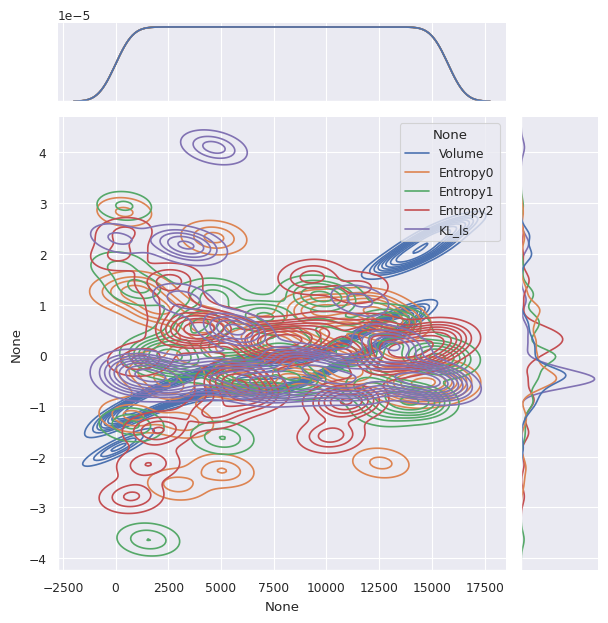

In [26]:
import seaborn as sns
sns.set_theme("paper")
#sns.set_context("paper")
sns.axes_style("white")

sns.jointplot(merged_df[col_to_analyse], kind='kde')

In [27]:
# Copula model

coords = {"obs_id": np.arange(len(merged_df['Volume']))}
with pm.Model(coords=coords) as marginal_model:
    """
    
    """
    # hypreprior
    #lambda_b = pm.HalfNormal('lambda_b', sigma = 10)
    # marginal estimation
    a_mu = pm.Normal("a_mu", mu=0, sigma=10)
    a_sigma = pm.Exponential("a_sigma", lam=0.5)
    pm.Normal("a", mu=a_mu, sigma=a_sigma, observed=merged_df['Volume'], dims="obs_id")

    b_mu = pm.Normal("b_mu", mu=0, sigma=10)
    b_sigma = pm.Exponential("b_sigma", lam=0.5 )
    pm.Normal("b", mu = b_mu , sigma = b_sigma , observed=merged_df['Entropy0'], dims="obs_id")

    c_mu = pm.Normal("c_mu", mu=0, sigma=10)
    c_sigma = pm.Exponential("c_sigma", lam=0.5 )
    pm.Normal("c", mu = c_mu , sigma = c_sigma , observed=merged_df['Entropy1'], dims="obs_id")

    d_mu = pm.Normal("d_mu", mu=0, sigma=10)
    d_sigma = pm.Exponential("d_sigma", lam=0.5 )
    pm.Normal("d", mu = d_mu , sigma = d_sigma , observed=merged_df['Entropy2'], dims="obs_id")


    e_mu = pm.Normal("e_mu", mu=0, sigma=10)
    e_sigma = pm.Exponential("e_sigma", lam=0.5 )
    pm.Normal("e", mu = e_mu , sigma = e_sigma , observed=merged_df['KL_ls'], dims="obs_id")

    f_mu = pm.Normal("f_mu", mu=0, sigma=10)
    f_sigma = pm.Exponential("f_sigma", lam=0.5 )
    pm.Normal("f", mu = f_mu , sigma = f_sigma , observed=merged_df['canonical_ecc'], dims="obs_id")



pm.model_graph.model_to_graphviz(marginal_model)
with marginal_model:
    marginal_idata = pm.sample(random_seed=1155)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_mu, a_sigma, b_mu, b_sigma, c_mu, c_sigma, d_mu, d_sigma, e_mu, e_sigma, f_mu, f_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [28]:
with marginal_model:
    pm.compute_log_likelihood(marginal_idata)

array([[<Axes: title={'center': 'a_mu'}>,
        <Axes: title={'center': 'a_mu'}>],
       [<Axes: title={'center': 'b_mu'}>,
        <Axes: title={'center': 'b_mu'}>],
       [<Axes: title={'center': 'c_mu'}>,
        <Axes: title={'center': 'c_mu'}>],
       [<Axes: title={'center': 'd_mu'}>,
        <Axes: title={'center': 'd_mu'}>],
       [<Axes: title={'center': 'e_mu'}>,
        <Axes: title={'center': 'e_mu'}>],
       [<Axes: title={'center': 'f_mu'}>,
        <Axes: title={'center': 'f_mu'}>],
       [<Axes: title={'center': 'a_sigma'}>,
        <Axes: title={'center': 'a_sigma'}>],
       [<Axes: title={'center': 'b_sigma'}>,
        <Axes: title={'center': 'b_sigma'}>],
       [<Axes: title={'center': 'c_sigma'}>,
        <Axes: title={'center': 'c_sigma'}>],
       [<Axes: title={'center': 'd_sigma'}>,
        <Axes: title={'center': 'd_sigma'}>],
       [<Axes: title={'center': 'e_sigma'}>,
        <Axes: title={'center': 'e_sigma'}>],
       [<Axes: title={'center': 'f_

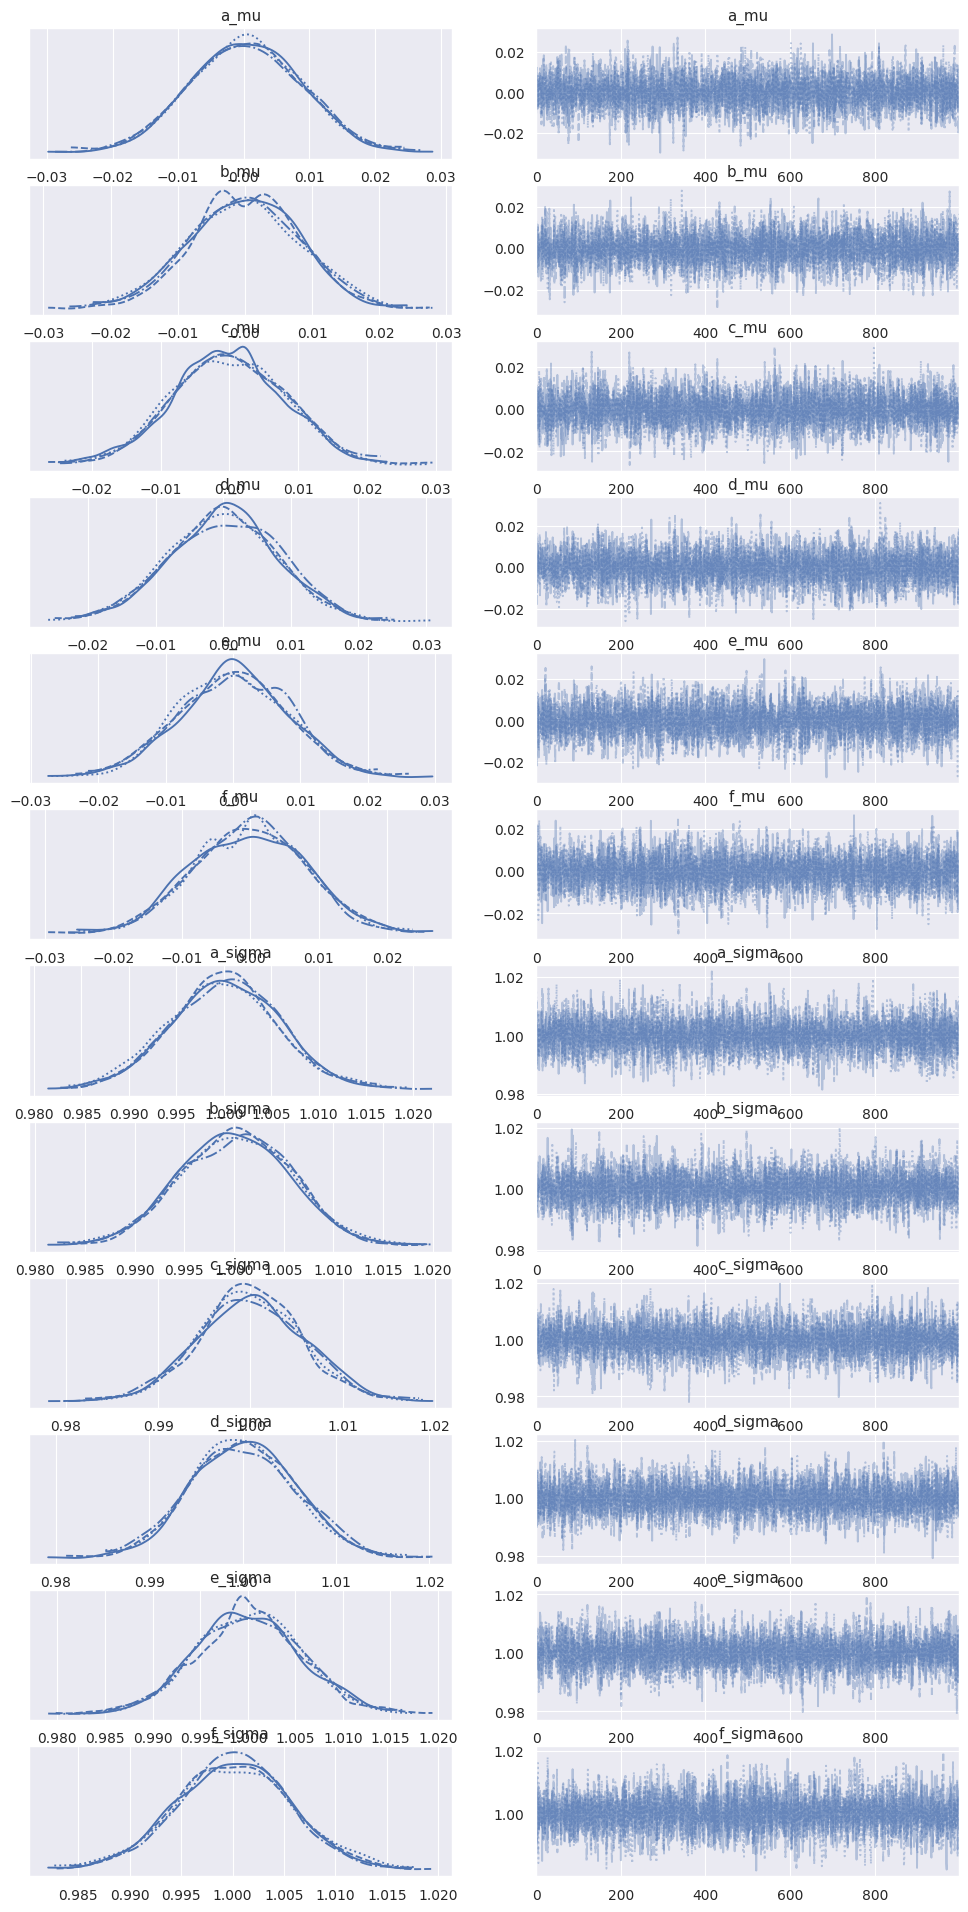

In [29]:
az.plot_trace(marginal_idata)

In [30]:
def transform_data(marginal_idata):
    # point estimates
    a_mu = marginal_idata.posterior["a_mu"].mean().item()
    a_sigma = marginal_idata.posterior["a_sigma"].mean().item()
    b_mu = marginal_idata.posterior["b_mu"].mean().item()
    b_sigma = marginal_idata.posterior["b_sigma"].mean().item()
    c_mu = marginal_idata.posterior["c_mu"].mean().item()
    c_sigma = marginal_idata.posterior["c_sigma"].mean().item()
    d_mu = marginal_idata.posterior["d_mu"].mean().item()
    d_sigma = marginal_idata.posterior["d_sigma"].mean().item()
    e_mu = marginal_idata.posterior["e_mu"].mean().item()
    e_sigma = marginal_idata.posterior["e_sigma"].mean().item()
    f_mu = marginal_idata.posterior["f_mu"].mean().item()
    f_sigma = marginal_idata.posterior["f_sigma"].mean().item()
    

    
    # transformations from observation space -> uniform space
    __a = pt.exp(pm.logcdf(pm.Normal.dist(mu=a_mu, sigma=a_sigma), merged_df['Volume']))
    __b = pt.exp(pm.logcdf(pm.Normal.dist(mu=b_mu, sigma=b_sigma), merged_df['Entropy0']))
    __c = pt.exp(pm.logcdf(pm.Normal.dist(mu=c_mu, sigma=c_sigma), merged_df['Entropy1']))
    __d = pt.exp(pm.logcdf(pm.Normal.dist(mu=d_mu, sigma=d_sigma), merged_df['Entropy2']))
    __e = pt.exp(pm.logcdf(pm.Normal.dist(mu=e_mu, sigma=e_sigma), merged_df['KL_ls']))
    __f = pt.exp(pm.logcdf(pm.Normal.dist(mu=f_mu, sigma=f_sigma), merged_df['canonical_ecc']))

    # uniform space -> multivariate normal space
    _a = pm.math.probit(__a)
    _b = pm.math.probit(__b)
    _c = pm.math.probit(__c)
    _d = pm.math.probit(__d)
    _e = pm.math.probit(__e)
    _f = pm.math.probit(__f)

    # join into an Nx2 matrix
    data = pt.math.stack([_a, _b, _c, _d, _e, _f], axis=1).eval()
    return data, a_mu, a_sigma, b_mu, b_sigma, c_mu, c_sigma, d_mu, d_sigma, e_mu, e_sigma, f_mu, f_sigma


data, a_mu, a_sigma, b_mu, b_sigma, c_mu, c_sigma, d_mu, d_sigma, e_mu, e_sigma, f_mu, f_sigma = transform_data(marginal_idata)

In [33]:
# Delete the inf values row
data = data[~np.isinf(data).any(1)]
np.count_nonzero(np.isinf(data))

0

In [36]:
df_new = pd.DataFrame(data)
df_new.columns = ['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'KL_ls','ecc']
df_new

,Volume,Entropy0,Entropy1,Entropy2,KL_ls,ecc
0,-1.816646,1.203865,1.753907,1.960400,2.304320,0.089280
1,-1.816646,1.203865,1.753907,1.960400,2.304320,0.075719
2,-1.816646,1.203865,1.753907,1.960400,2.304320,-17.803964
3,-1.816646,1.203865,1.753907,1.960400,2.304320,0.040407
4,-1.816646,1.203865,1.753907,1.960400,2.304320,0.030401
...,...,...,...,...,...,...
15758,2.358089,-0.473143,-0.043646,0.317288,-0.530378,-0.076075
15759,2.358089,-0.473143,-0.043646,0.317288,-0.530378,0.062592
15760,2.358089,-0.473143,-0.043646,0.317288,-0.530378,0.054260
15761,2.358089,-0.473143,-0.043646,0.317288,-0.530378,0.095746


In [37]:
coords = {"obs_id": np.arange(len(df_new['Volume']))}
coords.update({"param": ["a", "b", "c", "d", "e", "f"], "param_bis": ["a", "b", "c", "d", "e", "f"]})
with pm.Model(coords=coords) as copula_model:
    # Prior on covariance of the multivariate normal
    chol, corr, stds = pm.LKJCholeskyCov(
        "chol",
        n=6,
        eta=2.0,
        sd_dist=pm.Exponential.dist(1.0),
        compute_corr=True,
    )
    cov = pm.Deterministic("cov", chol.dot(chol.T), dims=("param", "param_bis"))

    # Likelihood function
    pm.MvNormal("N", mu=0.0, cov=cov, observed=data, dims=("obs_id", "param"))

pm.model_graph.model_to_graphviz(copula_model)
with copula_model:
    copula_idata = pm.sample(random_seed=RANDOM_SEED, tune=2000, cores=-1)
    pm.compute_log_likelihood(copula_idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [chol]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 374 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [38]:
copula_idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

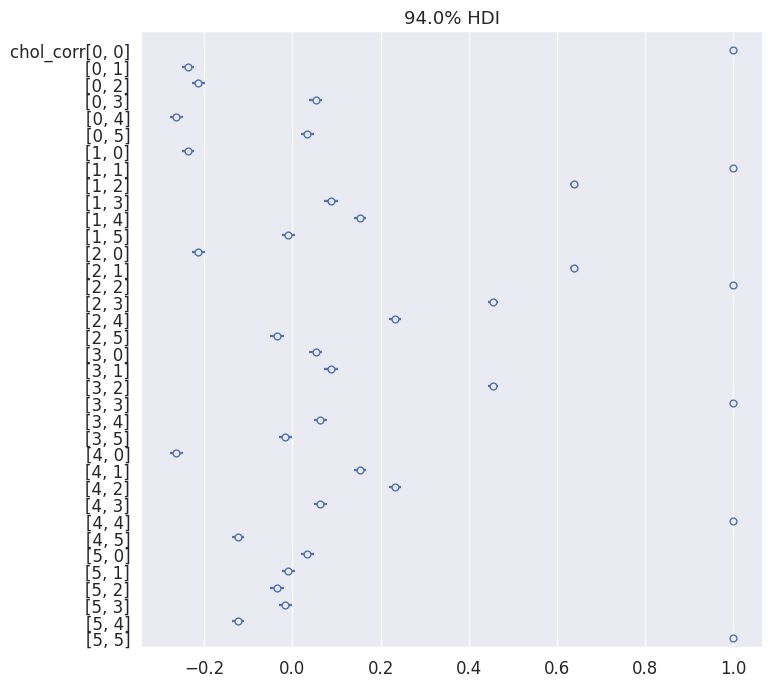

In [39]:
az.plot_forest(copula_idata, combined=True, var_names=['chol_corr'], figsize=(8,8), textsize=12)

In [40]:
az.summary(copula_idata, var_names="~chol", round_to=2)

/home/samuel/anaconda3/envs/behave/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"chol_corr[0, 0]",1.00,0.00,1.00,1.00,0.0,0.0,2000.00,2000.00,NaN
"chol_corr[0, 1]",-0.24,0.01,-0.25,-0.22,0.0,0.0,2547.29,1632.03,1.0
"chol_corr[0, 2]",-0.21,0.01,-0.23,-0.20,0.0,0.0,2371.59,1747.13,1.0
"chol_corr[0, 3]",0.05,0.01,0.04,0.07,0.0,0.0,3440.45,1694.10,1.0
"chol_corr[0, 4]",-0.26,0.01,-0.28,-0.25,0.0,0.0,4259.87,1379.40,1.0
...,...,...,...,...,...,...,...,...,...
"cov[f, b]",-0.01,0.01,-0.02,0.01,0.0,0.0,6039.29,1248.89,1.0
"cov[f, c]",-0.03,0.01,-0.05,-0.02,0.0,0.0,4473.98,1320.79,1.0
"cov[f, d]",-0.02,0.01,-0.03,-0.00,0.0,0.0,3756.47,1350.57,1.0
"cov[f, e]",-0.12,0.01,-0.13,-0.11,0.0,0.0,5046.29,1524.35,1.0


<Axes: >

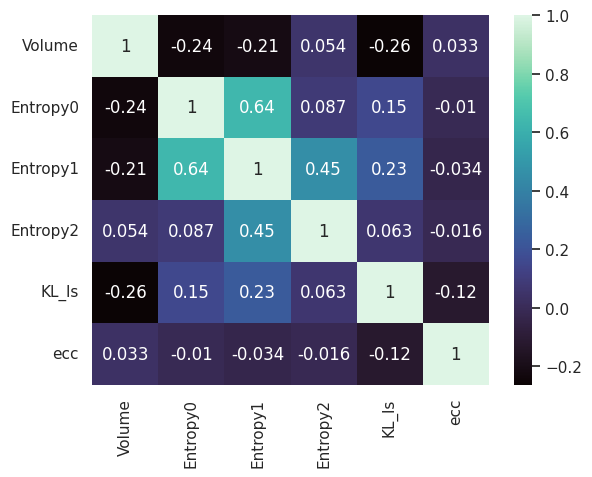

In [42]:
sns.set(font_scale=1)
sns.heatmap(copula_idata.posterior.chol_corr.values.mean(axis=1)[0], annot=True, xticklabels=['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'KL_ls','ecc'], yticklabels=['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'KL_ls','ecc'], cmap="mako")

In [43]:
copula_idata.posterior.chol_corr.values.mean(axis=1)[0]

array([[ 1.        , -0.1477717 , -0.16992329, -0.05937197, -0.12739843],
       [-0.1477717 ,  1.        ,  0.72146654,  0.13584944,  0.01659893],
       [-0.16992329,  0.72146654,  1.        ,  0.46357517,  0.12568653],
       [-0.05937197,  0.13584944,  0.46357517,  1.        ,  0.09225334],
       [-0.12739843,  0.01659893,  0.12568653,  0.09225334,  1.        ]])

In [68]:
d['cov'].shape

(50000,)

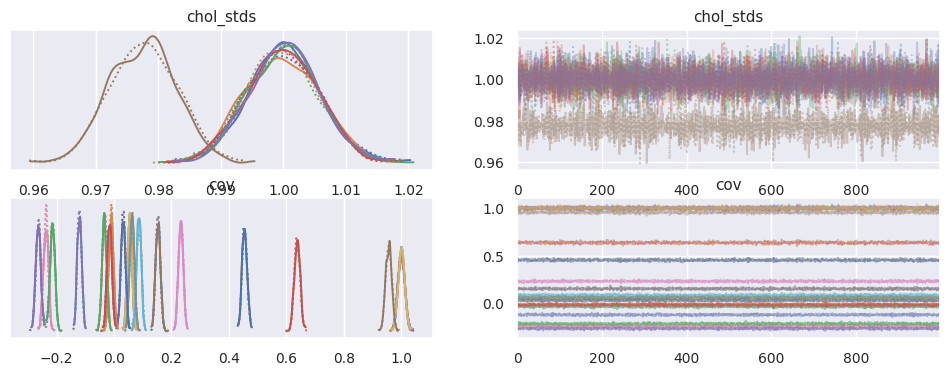

In [43]:
az.plot_trace(
    copula_idata,
    var_names=["~chol", "~chol_corr"],
    compact=True
);

In [44]:
Sigma_post = copula_idata.posterior["cov"].mean(("chain", "draw")).values

In [45]:
Sigma_post

array([[ 1.00042336, -0.2370125 , -0.21409867,  0.05429381, -0.26355807,
         0.03208856],
       [-0.2370125 ,  0.99945946,  0.63744004,  0.08678301,  0.15307023,
        -0.00986308],
       [-0.21409867,  0.63744004,  0.99984249,  0.45440765,  0.23261277,
        -0.0334239 ],
       [ 0.05429381,  0.08678301,  0.45440765,  0.99974817,  0.06278374,
        -0.01570423],
       [-0.26355807,  0.15307023,  0.23261277,  0.06278374,  1.00030413,
        -0.12024864],
       [ 0.03208856, -0.00986308, -0.0334239 , -0.01570423, -0.12024864,
         0.95570547]])

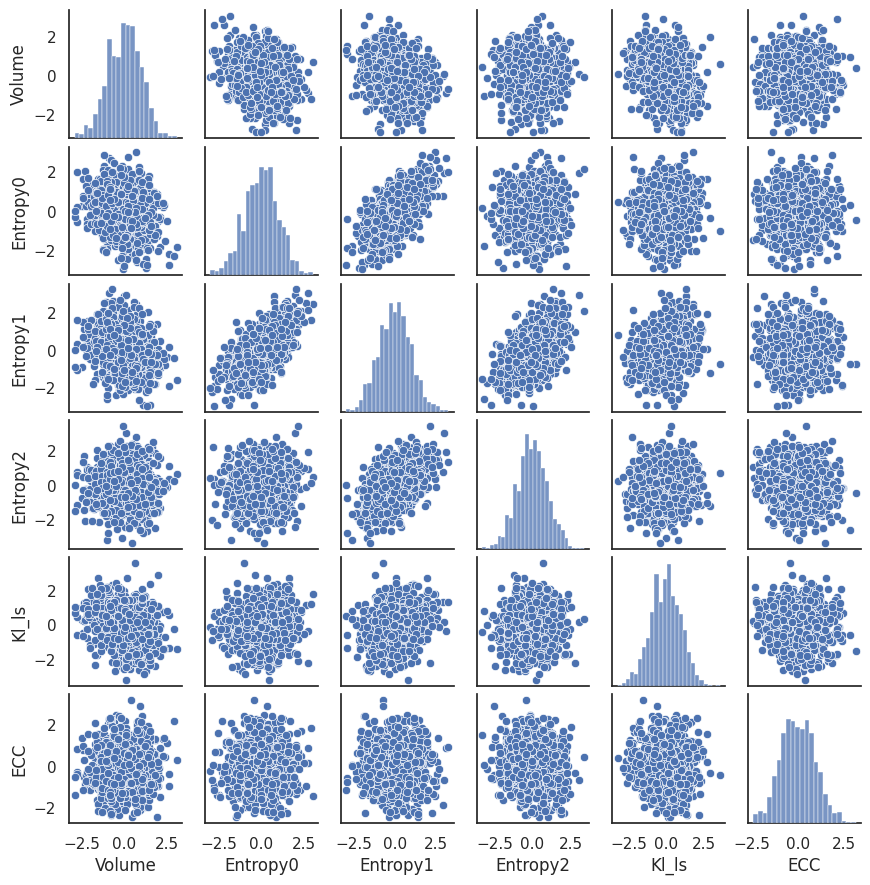

In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
num_samples = 1000
num_variables = 6

# Generate samples from multivariate normal distribution
mean = np.zeros(num_variables)
covariance_matrix = Sigma_post  # Your covariance matrix goes here

samples = np.random.multivariate_normal(mean, covariance_matrix, size=num_samples)

# Variable names
variable_names = ['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'Kl_ls', 'ECC']

# Convert samples to DataFrame
df2 = pd.DataFrame(samples, columns=variable_names)

# Plot full joint distribution
sns.set(style="white")
sns.pairplot(df2, height=1.5)
plt.show()
#plt.savefig('results_pymc/pairplot_big_copula.pdf')

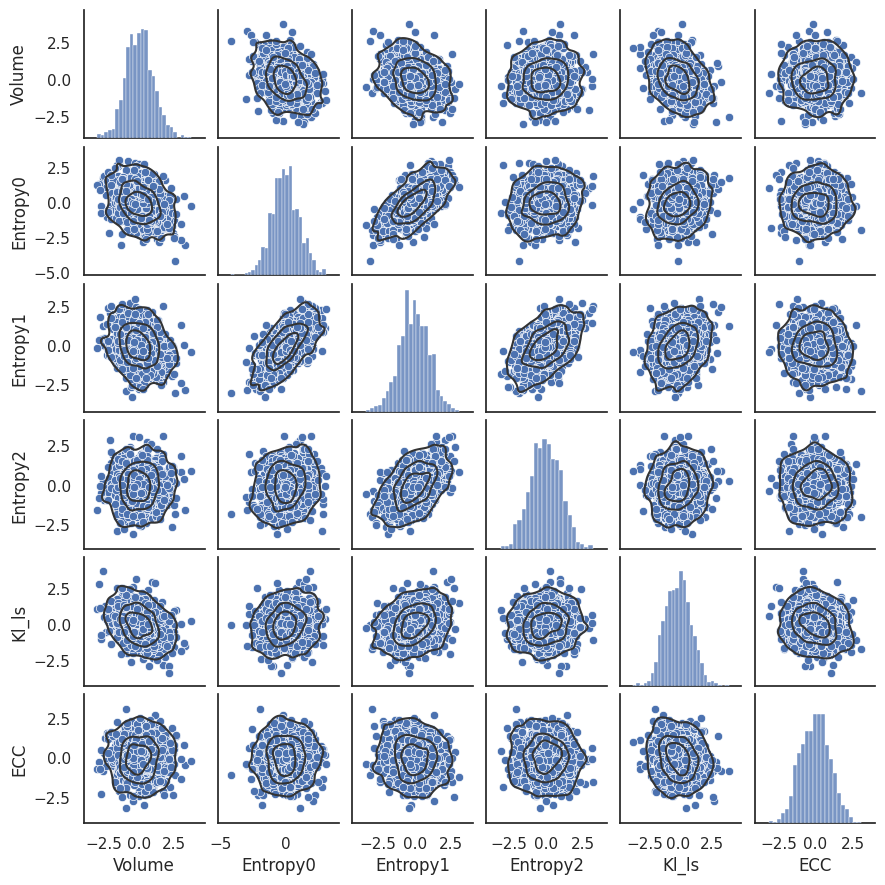

In [88]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
num_samples = 1000
num_variables = 6

# Generate samples from multivariate normal distribution
mean = np.zeros(num_variables)
covariance_matrix = Sigma_post  # Your covariance matrix goes here

samples = np.random.multivariate_normal(mean, covariance_matrix, size=num_samples)

# Variable names
variable_names = ['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'Kl_ls', 'ECC'] 

# Convert samples to DataFrame
df2 = pd.DataFrame(samples, columns=variable_names)

# Plot full joint distribution
sns.set(style="white")
g = sns.pairplot(df2, height=1.5)
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()
#plt.savefig('results_pymc/pairplot_big_copula.pdf')

In [53]:
cop = df

# Linear regression models

## Volume and entropies

The DAG is the following: E0 -> E1, E1 -> E2, E2 -> Volume

The model is thus:

Volume ~ N(f(E0, E1, E2), sigma)

This is a pipe!

If we want to have the brain entropy2 effect on Volume we need to consider all the entropies to block the effect of E1 and E0 to avoid post-treatment bias. 

If we want to know the effect of E1 we have to model E1 and E0 but not E2 otherwise we will underestimate E1 importance.

To model E0 effect, we have to model only E0 otherwise E0 effect will be minimised. 

This is the pipe bias!



## Entropies and behaviour

The DAG is:

E0 -> KL (only if time series!), E0 -> E1 -> E2 -> KL

We have the same pipe structure as previously so the same pipeline has to be applied.

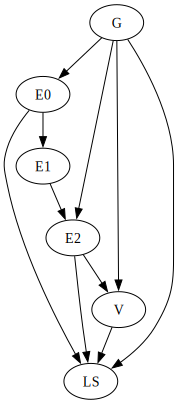

In [85]:
g = gr.Digraph()
g.edge(tail_name='G', head_name='E0')
g.edge(tail_name='G', head_name='LS')
g.edge(tail_name='G', head_name='V')
g.edge(tail_name='G', head_name='E2')
g.edge(tail_name='E1', head_name='E2')
g.edge(tail_name='E0', head_name='E1')
g.edge(tail_name='E2', head_name='V')
g.edge(tail_name='V', head_name='LS')
g.edge(tail_name='E2', head_name='LS')
g.edge(tail_name='E0', head_name='LS')

g


In [54]:
cop

,Volume,Entropy0,Entropy1,Entropy2,Kl_ls,ECC
0,1.775537,-1.218640,-1.785689,-2.448772,-2.401146,1.259062
1,1.222528,-0.755314,-0.717558,-0.908130,-1.100077,-1.306787
2,0.270751,-0.847913,-0.381509,-0.292486,-0.532167,-0.976089
3,-0.045084,-0.808276,-0.133876,-0.638764,-0.560020,1.124096
4,1.288428,-1.463264,-1.963755,-1.445237,-1.229128,0.870748
...,...,...,...,...,...,...
995,0.409501,-0.848054,-0.222154,0.162579,-0.677565,-0.800263
996,0.022353,-0.010451,-1.701460,-0.697043,-0.150504,1.044613
997,-0.838264,0.563561,-0.266553,-0.823274,1.105904,-1.364494
998,1.567140,-0.767882,-0.632610,-0.118333,0.917911,-0.829883


## Causal inference

In [124]:
Entropy2 = cop["Entropy2"]
Volume = cop["Volume"]
KL_ls = cop["Kl_ls"]

# X is Volume
# z is Entropy2
# y is ls

In [55]:
# Entropies and volume 

import bambi as bmb
# Initialize the fixed effects-only model
model1 = bmb.Model('Kl_ls ~ Entropy0 ', df) # Effect of entropy0
model2 = bmb.Model('Kl_ls ~ Entropy0 + Entropy1 ', df) # Effect of entropy1
model3 = bmb.Model('Kl_ls ~ Entropy0 + Entropy1 + Entropy2 ', df) # Effect of entropy2
model4 = bmb.Model('Kl_ls ~ Volume ', df)
model5 = bmb.Model('Kl_ls ~ ECC ', df)
model6 = bmb.Model('Kl_ls ~ Entropy0 + Entropy1 + Entropy2 + Volume ', df)
model7 = bmb.Model('Kl_ls ~ Entropy0 + Entropy1 + Entropy2 + ECC ', df)
model8 = bmb.Model('Kl_ls ~ ECC + Volume ', df)
model9 = bmb.Model('Kl_ls ~ Entropy0 + Entropy1 + Entropy2 + ECC + Volume ', df)

# Fit the model using 1000 on each of 4 chains
results1 = model1.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results2 = model2.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results3 = model3.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results4 = model4.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results5 = model5.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results6 = model6.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results7 = model7.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results8 = model8.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
results9 = model9.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})
# Use ArviZ to plot the results
#az.plot_trace(results1)
#az.plot_trace(results2)
#az.plot_trace(results3)




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Entropy0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Entropy0, Entropy1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Entropy0, Entropy1, Entropy2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Volume]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, ECC]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Entropy0, Entropy1, Entropy2, Volume]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Entropy0, Entropy1, Entropy2, ECC]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, ECC, Volume]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Kl_ls_sigma, Intercept, Entropy0, Entropy1, Entropy2, ECC, Volume]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

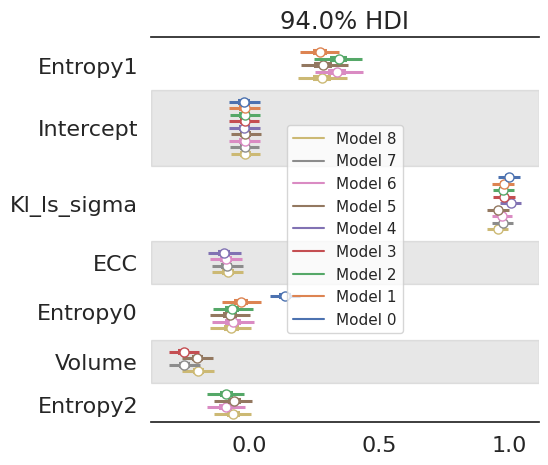

In [56]:
az.plot_forest(data=[results1,results2, results3, results4,results5,results6,results7,results8,results9],
                r_hat=False, combined=True, textsize=16, legend=True, 
              figsize=(5, 5))

In [57]:
to_compare = {'model1':results1, 
              'model2':results2, 
              'model3':results3,
              'model4':results4,
             'model5':results5,
             'model6':results6,
             'model7':results7,
             'model8':results8,
             'model9':results9}

In [58]:
az.compare(to_compare)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model9,0,-1375.596299,7.043286,0.000000,0.780697,23.427796,0.000000,False,log
model6,1,-1377.753873,6.008187,2.157575,0.150371,23.449846,2.409092,False,log
model7,2,-1392.873019,5.821305,17.276720,0.000000,22.788469,6.130265,False,log
model8,3,-1395.011602,3.928141,19.415303,0.000000,22.865384,6.469268,False,log
model3,4,-1395.670216,4.921867,20.073917,0.000000,22.757864,6.545489,False,log
model2,5,-1397.444140,4.016012,21.847841,0.000000,22.824284,7.091102,False,log
model4,6,-1397.675699,3.063840,22.079400,0.000000,22.920938,6.961347,False,log
model1,7,-1419.187819,2.942499,43.591520,0.000000,22.405013,9.755477,False,log
model5,8,-1424.376798,2.880215,48.780499,0.068933,22.122633,10.326175,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

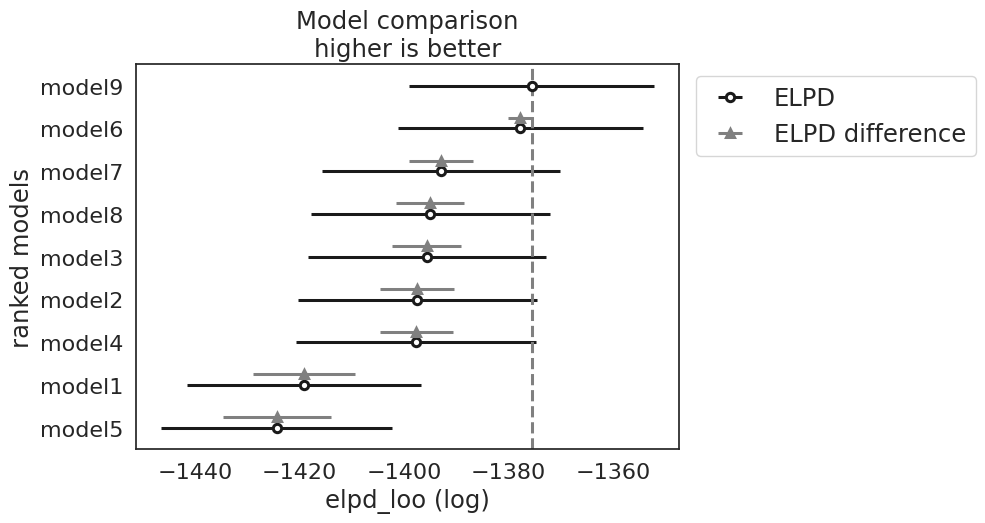

In [61]:
az.plot_compare(az.compare(to_compare), figsize=(7,5), textsize=16)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_waic (log)', ylabel='ranked models'>

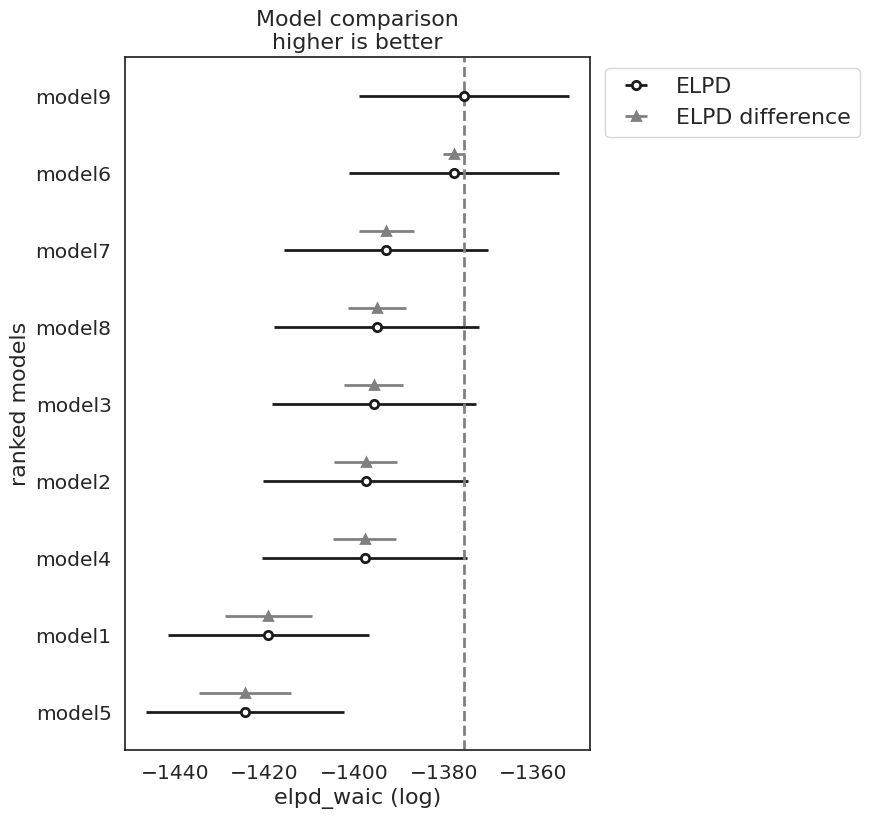

In [60]:
az.plot_compare(az.compare(to_compare, ic='waic'))

<xarray.Dataset> Size: 40B
Dimensions:   ()
Data variables:
    Entropy0  float64 8B -0.05385
    Entropy1  float64 8B 0.1761
    Entropy2  float64 8B -0.05123
    Volume    float64 8B -0.1905
    ECC       float64 8B -0.08105


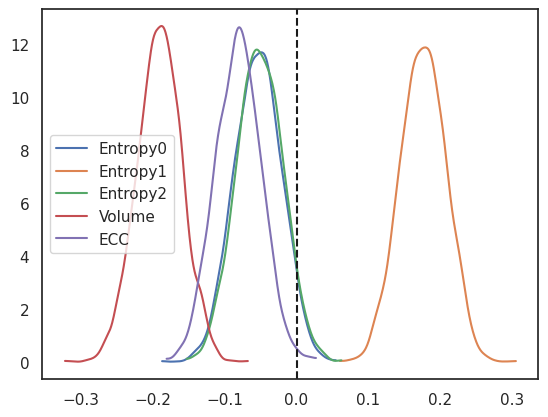

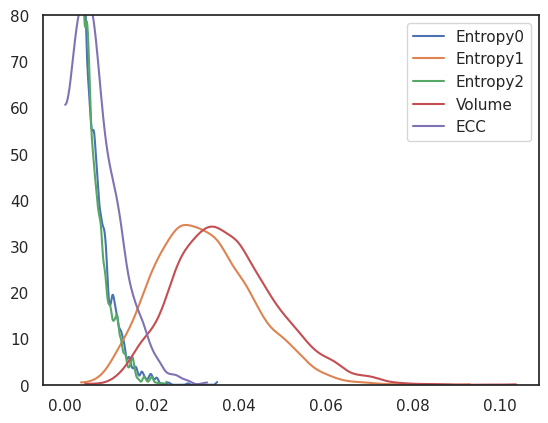

In [62]:
samples = results9.posterior

# the names of the predictors
varnames = ['Entropy0', 'Entropy1','Entropy2','Volume','ECC']

# compute the needed statistics like R-squared when each predictor is response and all the 
# other predictors are the predictor

# x_matrix = common effects design matrix (excluding intercept/constant term)
terms = [t for t in model9.response_component.common_terms.values() if t.name != "Intercept"]
x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
x_matrix = pd.concat(x_matrix, axis=1)
x_matrix.columns = varnames

dm_statistics = {
    'r2_x': pd.Series(
        {
            x: sm.OLS(
                endog=x_matrix[x],
                exog=sm.add_constant(x_matrix.drop(x, axis=1))
                if "Intercept" in model9.response_component.terms
                else x_matrix.drop(x, axis=1),
            )
            .fit()
            .rsquared
            for x in list(x_matrix.columns)
        }
    ),
    'sigma_x': x_matrix.std(),
    'mean_x': x_matrix.mean(axis=0),
}

r2_x = dm_statistics['r2_x']
sd_x = dm_statistics['sigma_x']
r2_y = pd.Series([sm.OLS(endog=df['Kl_ls'],
                         exog=sm.add_constant(df[[p for p in varnames if p != x]])).fit().rsquared
                  for x in varnames], index=varnames)
sd_y = df['Kl_ls'].std()

# compute the products to multiply each slope with to produce the partial correlations
slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
slope_constant

pcorr_samples = (samples[varnames] * slope_constant)
print(pcorr_samples.mean())

# Pass the same axes to az.plot_kde to have all the densities in the same plot
_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_dist(v, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.axvline(x=0, color='k', linestyle='--');

_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_dist(v ** 2, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.set_ylim(0, 80);

In [63]:
az.summary(results9)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.017,0.030,-0.072,0.039,0.000,0.000,5207.0,3007.0,1.0
Entropy0,-0.070,0.042,-0.151,0.006,0.001,0.000,4311.0,3290.0,1.0
Entropy1,0.279,0.050,0.187,0.373,0.001,0.001,3534.0,2752.0,1.0
Entropy2,-0.062,0.039,-0.137,0.007,0.001,0.000,4219.0,3545.0,1.0
ECC,-0.083,0.032,-0.146,-0.026,0.000,0.000,5270.0,2786.0,1.0
Volume,-0.198,0.032,-0.260,-0.138,0.000,0.000,4890.0,2504.0,1.0
Kl_ls_sigma,0.954,0.022,0.914,0.995,0.000,0.000,5423.0,2868.0,1.0


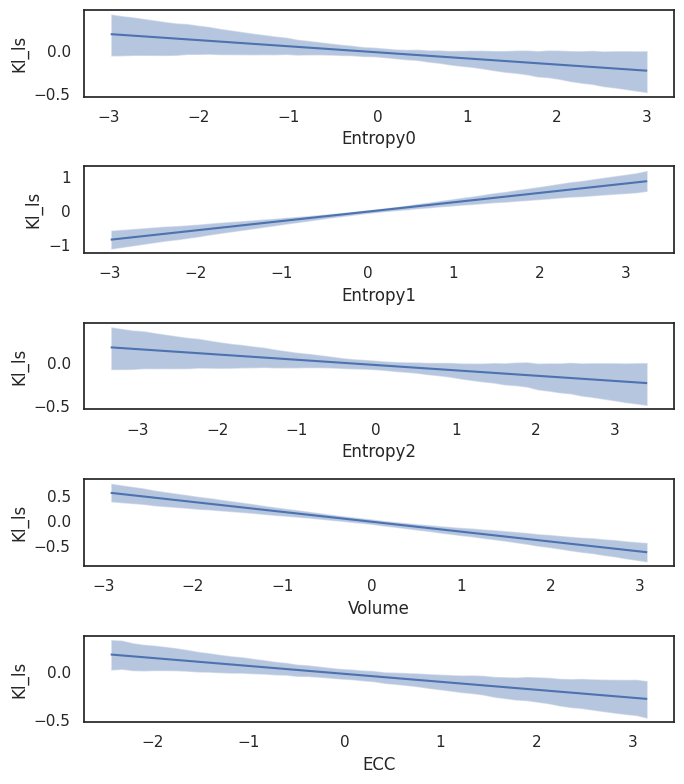

In [70]:
fig, ax = plt.subplots(5, figsize=(7,8))
bmb.interpret.plot_predictions(model9, results9, "Entropy0", ax=ax[0]);
bmb.interpret.plot_predictions(model9, results9, "Entropy1", ax=ax[1]);
bmb.interpret.plot_predictions(model9, results9, "Entropy2", ax=ax[2]);
bmb.interpret.plot_predictions(model9, results9, "Volume", ax=ax[3]);
bmb.interpret.plot_predictions(model9, results9, "ECC", ax=ax[4]);
#bmb.interpret.plot_predictions(model3, results3, "Entropy2", ax=ax[2]);
fig.tight_layout()

In [71]:
df

,Volume,Entropy0,Entropy1,Entropy2,Kl_ls,ECC
0,1.775537,-1.218640,-1.785689,-2.448772,-2.401146,1.259062
1,1.222528,-0.755314,-0.717558,-0.908130,-1.100077,-1.306787
2,0.270751,-0.847913,-0.381509,-0.292486,-0.532167,-0.976089
3,-0.045084,-0.808276,-0.133876,-0.638764,-0.560020,1.124096
4,1.288428,-1.463264,-1.963755,-1.445237,-1.229128,0.870748
...,...,...,...,...,...,...
995,0.409501,-0.848054,-0.222154,0.162579,-0.677565,-0.800263
996,0.022353,-0.010451,-1.701460,-0.697043,-0.150504,1.044613
997,-0.838264,0.563561,-0.266553,-0.823274,1.105904,-1.364494
998,1.567140,-0.767882,-0.632610,-0.118333,0.917911,-0.829883


In [72]:
from sklearn.cross_decomposition import CCA
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with columns: 'Volume', 'alpha_entropy0', 'alpha_entropy1', 'alpha_entropy2', 
# 'Entropy0', 'Entropy1', 'Entropy2'

# Extract relevant columns
# Create a string containing all the 'ecc_i' column names
col_to_analyse = ['Volume', 'Entropy0', 'Entropy1', 'Entropy2', 'ECC']

# Replace 'sum_ecc' with the concatenated column names
X = df[col_to_analyse]
 # 'alpha_entropies'
Y = df['Kl_ls']

# Initialize CCA model
cca = CCA(n_components=1)

# Fit the model
cca.fit(X, Y)

# Transform the data to canonical variables
canonical_X, canonical_Y = cca.transform(X, Y)

# Get canonical coefficients for Volume
canonical_coefficients = cca.coef_

# Display the canonical coefficients for Volume
print("Canonical Coefficients for KL:")
print(canonical_coefficients)


Canonical Coefficients for KL:
[[-0.53695981 -0.19874762  0.78084683 -0.17453299 -0.21552903]]


In [73]:
df['canonical_kl'] = canonical_Y
df['canonical_multilevel'] = canonical_X

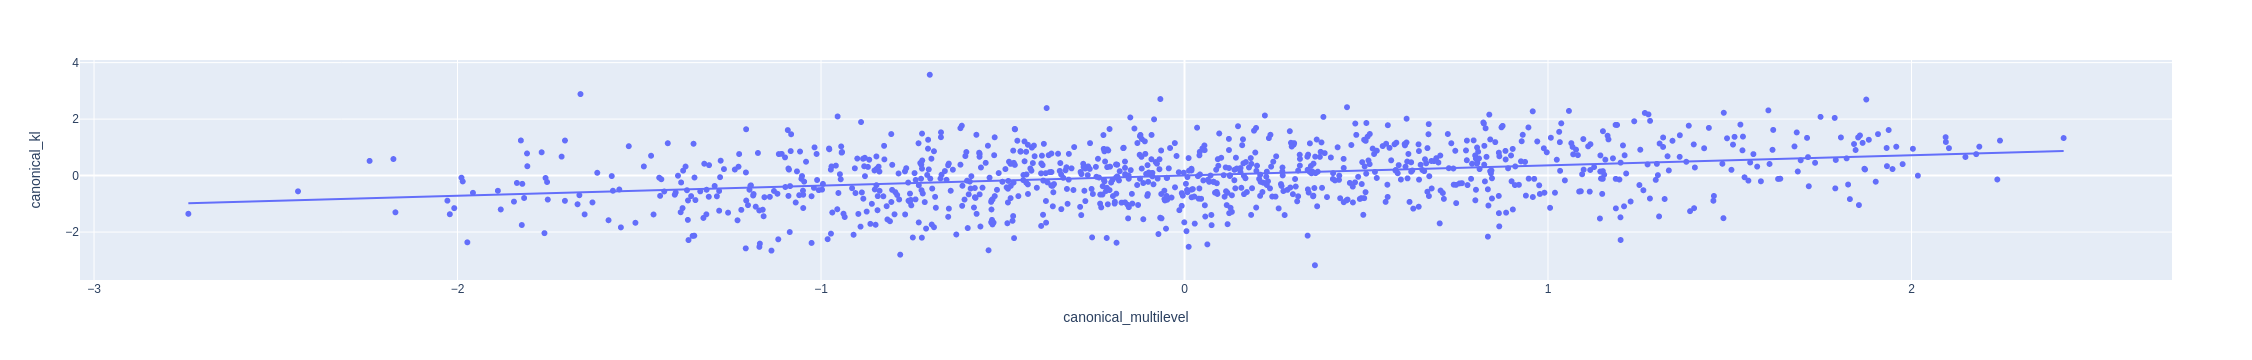

In [76]:
import plotly.express as px

px.scatter(df, 'canonical_multilevel', 'canonical_kl', trendline='ols')

In [79]:
import bambi as bmb
# Initialize the fixed effects only model
model_h = bmb.Model('canonical_kl ~ canonical_multilevel  ', df)

# Fit the model using 1000 on each of 4 chains
results_h = model_h.fit(draws=1000, chains=4,idata_kwargs={"log_likelihood": True})



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [canonical_kl_sigma, Intercept, canonical_multilevel]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


<xarray.Dataset> Size: 8B
Dimensions:               ()
Data variables:
    canonical_multilevel  float64 8B 0.3291


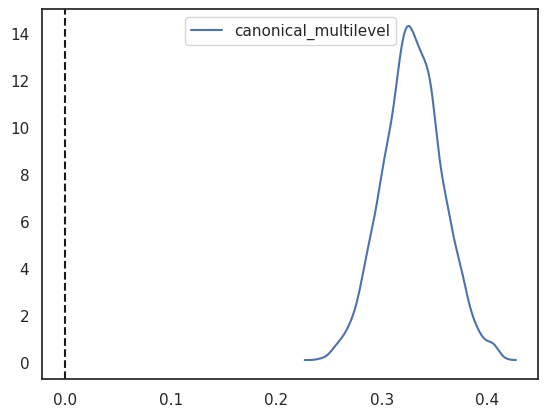

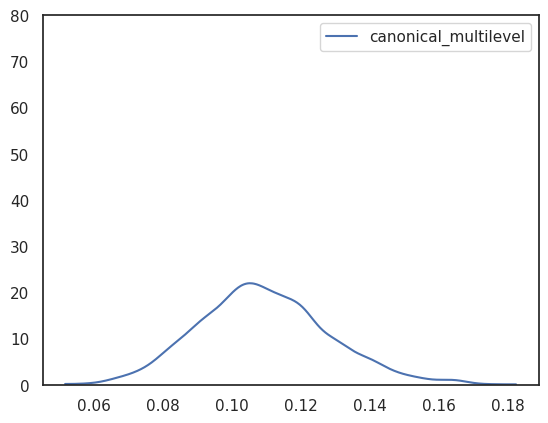

In [80]:
samples = results_h.posterior

# the names of the predictors
varnames = ['canonical_multilevel']

# compute the needed statistics like R-squared when each predictor is response and all the 
# other predictors are the predictor

# x_matrix = common effects design matrix (excluding intercept/constant term)
terms = [t for t in model_h.response_component.common_terms.values() if t.name != "Intercept"]
x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
x_matrix = pd.concat(x_matrix, axis=1)
x_matrix.columns = varnames

dm_statistics = {
    'r2_x': pd.Series(
        {
            x: sm.OLS(
                endog=x_matrix[x],
                exog=sm.add_constant(x_matrix.drop(x, axis=1))
                if "Intercept" in model_h.response_component.terms
                else x_matrix.drop(x, axis=1),
            )
            .fit()
            .rsquared
            for x in list(x_matrix.columns)
        }
    ),
    'sigma_x': x_matrix.std(),
    'mean_x': x_matrix.mean(axis=0),
}

r2_x = dm_statistics['r2_x']
sd_x = dm_statistics['sigma_x']
r2_y = pd.Series([sm.OLS(endog=cop['canonical_kl'],
                         exog=sm.add_constant(cop[[p for p in varnames if p != x]])).fit().rsquared
                  for x in varnames], index=varnames)
sd_y = cop['canonical_kl'].std()

# compute the products to multiply each slope with to produce the partial correlations
slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
slope_constant

pcorr_samples = (samples[varnames] * slope_constant)
print(pcorr_samples.mean())

# Pass the same axes to az.plot_kde to have all the densities in the same plot
_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_dist(v, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.axvline(x=0, color='k', linestyle='--');

_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_dist(v ** 2, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.set_ylim(0, 80);

In [84]:
print(pcorr_samples.mean())

<xarray.Dataset> Size: 8B
Dimensions:               ()
Data variables:
    canonical_multilevel  float64 8B 0.3291


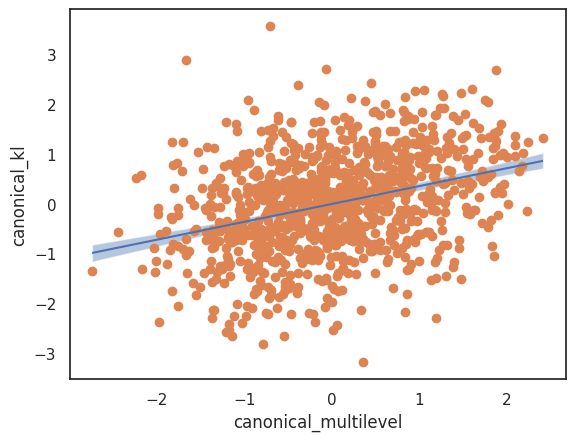

In [83]:

bmb.interpret.plot_predictions(model_h, results_h, "canonical_multilevel");
plt.scatter(cop["canonical_multilevel"], cop["canonical_kl"])
fig.tight_layout()